# Исследование лояльности клиентов

### Необходимые библиотеки 

In [1]:
import pandas as pd
from sqlalchemy import create_engine


### Выгрузка данных 

In [2]:
path_to_db = '/datasets/telecomm_csi.db' 
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

query = """
SELECT * 
FROM location
"""

location = pd.read_sql(query, engine)
display(location)

,location_id,city,country
0,1,Архангельск,Россия
1,2,Астрахань,Россия
2,3,Балашиха,Россия
3,4,Барнаул,Россия
4,5,Белгород,Россия
...,...,...,...
57,58,Челябинск,Россия
58,59,Череповец,Россия
59,60,Чита,Россия
60,61,Якутск,Россия


In [3]:
query = """
SELECT * 
FROM user
"""
user = pd.read_sql(query, engine)
display(user)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,55,5,5,8,10
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,21,5,5,8,10
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,28,6,9,6,10
3,A004TB,4190,44.0,1.0,IOS,SMARTPHONE,38,4,4,8,10
4,A004XT,1163,24.0,0.0,ANDROID,SMARTPHONE,39,2,6,8,10
...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,54.0,1.0,ANDROID,SMARTPHONE,28,5,5,8,5
502489,ZZZLWY,129,31.0,0.0,ANDROID,SMARTPHONE,28,3,5,4,8
502490,ZZZQ5F,522,36.0,0.0,ANDROID,SMARTPHONE,47,4,10,6,10
502491,ZZZQ8E,2936,37.0,1.0,ANDROID,SMARTPHONE,53,4,18,8,9


In [4]:
query = """
SELECT * 
FROM age_segment
"""
age_segment = pd.read_sql(query, engine)
display(age_segment)

,age_gr_id,bucket_min,bucket_max,title
0,1,NaN,15.0,01 до 16
1,2,16.0,24.0,02 16-24
2,3,25.0,34.0,03 25-34
3,4,35.0,44.0,04 35-44
4,5,45.0,54.0,05 45-54
5,6,55.0,64.0,06 55-64
6,7,66.0,NaN,07 66 +
7,8,NaN,NaN,08 n/a


In [5]:
age_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_gr_id   8 non-null      int64  
 1   bucket_min  6 non-null      float64
 2   bucket_max  6 non-null      float64
 3   title       8 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


In [6]:
query = """
SELECT * 
FROM traffic_segment
"""
traffic_segment = pd.read_sql(query, engine)
display(traffic_segment)

,tr_gr_id,bucket_min,bucket_max,title
0,1,0.00,0.00,01 0
1,2,0.00,0.01,01 0-0.01
2,3,0.01,0.10,02 0.01-0.1
3,4,0.10,1.00,03 0.1-1
4,5,1.00,5.00,04 1-5
5,6,5.00,10.00,05 5-10
6,7,10.00,15.00,06 10-15
7,8,15.00,20.00,07 15-20
8,9,20.00,25.00,08 20-25
9,10,25.00,30.00,09 25-30


In [7]:
traffic_uniques = traffic_segment['title'].sort_values().unique()
print(traffic_uniques)

['01 0' '01 0-0.01' '02 0.01-0.1' '03 0.1-1' '04 1-5' '05 5-10' '06 10-15'
 '07 15-20' '08 20-25' '09 25-30' '10 30-35' '11 35-40' '12 40-45'
 '13 45-50' '14 50-55' '15 55-60' '16 60-65' '17 65-70' '18 70-75'
 '19 75-80' '20 80-85' '21 85-90' '22 90-95' '23 95-100' '24 100+']


In [8]:
query = """
SELECT * 
FROM lifetime_segment
"""
lifetime_segment = pd.read_sql(query, engine)
display(lifetime_segment)

,lt_gr_id,bucket_min,bucket_max,title
0,1,1.0,1.0,01 1
1,2,2.0,2.0,02 2
2,3,3.0,3.0,03 3
3,4,4.0,6.0,04 4-6
4,5,7.0,12.0,05 7-12
5,6,13.0,24.0,06 13-24
6,7,25.0,36.0,07 25-36
7,8,36.0,NaN,08 36+


### Создание сводной таблицы 

Запрос выгрузит следующие поля:

In [9]:
query = """
SELECT  u.user_id,
        u.lt_day,
        CASE
           WHEN u.lt_day > 365 THEN 0
           ELSE 1
        END as is_new,
        u.age,
        CASE
           WHEN u.gender_segment = 1 THEN 'женщина'
           Else 'мужчина'
        END as gender,        
        u.os_name,
        u.cpe_type_name,
        loc.country,
        loc.city,
        substr(ags.title, 4, 8)  as age_segment,
        substr(tr.title, 4, 8) as traffic_segment,
        substr(lt.title, 4, 8) as lifetime_segment,
        u.nps_score,
        CASE
           WHEN u.nps_score >= 9 THEN 'сторонники'
           WHEN u.nps_score >= 7 THEN 'нейтралы'
           ELSE 'критики'
        END as nps_group
           
FROM user u
JOIN location loc
    ON u.location_id = loc.location_id
JOIN age_segment ags
    ON u.age_gr_id = ags.age_gr_id
JOIN traffic_segment tr
    ON u.tr_gr_id = tr.tr_gr_id
JOIN lifetime_segment lt
    ON u.lt_gr_id = lt.lt_gr_id
"""
data = pd.read_sql(query, engine)
display(data)

,user_id,lt_day,is_new,age,gender,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,0,45.0,женщина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,сторонники
1,A001WF,2344,0,53.0,мужчина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,сторонники
2,A003Q7,467,0,57.0,мужчина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,сторонники
3,A004TB,4190,0,44.0,женщина,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,сторонники
4,A004XT,1163,0,24.0,мужчина,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,сторонники
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,0,54.0,женщина,ANDROID,SMARTPHONE,Россия,Москва,45-54,1-5,36+,5,критики
502489,ZZZLWY,129,1,31.0,мужчина,ANDROID,SMARTPHONE,Россия,Москва,25-34,1-5,4-6,8,нейтралы
502490,ZZZQ5F,522,0,36.0,мужчина,ANDROID,SMARTPHONE,Россия,Сургут,35-44,25-30,13-24,10,сторонники
502491,ZZZQ8E,2936,0,37.0,женщина,ANDROID,SMARTPHONE,Россия,УланУдэ,35-44,65-70,36+,9,сторонники


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502493 non-null  object 
 1   lt_day            502493 non-null  int64  
 2   is_new            502493 non-null  int64  
 3   age               501939 non-null  float64
 4   gender            502493 non-null  object 
 5   os_name           502493 non-null  object 
 6   cpe_type_name     502493 non-null  object 
 7   country           502493 non-null  object 
 8   city              502493 non-null  object 
 9   age_segment       502493 non-null  object 
 10  traffic_segment   502493 non-null  object 
 11  lifetime_segment  502493 non-null  object 
 12  nps_score         502493 non-null  int64  
 13  nps_group         502493 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 53.7+ MB


В колонке Age есть пропуски, скорее всего это люди, не указавшие свой возраст. Оставим их, так как в Tableau мы их положим в поле "Не указали возраст". Сохраняем таблицу в файл csv:

In [11]:
data.to_csv('sprint10_project_data.csv', index=False) 

### Cсылки

Ссылка на визуализацию: https://public.tableau.com/app/profile/aleks1130/viz/Sprint10_project/NP#1

In [16]:
d = data.assign(total_nps=lambda row: row['nps_group'].map({'сторонники': 1, 'нейтралы': 0, 'критики': -1}))
display(d)

,user_id,lt_day,is_new,age,gender,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group,total_nps
0,A001A2,2320,0,45.0,женщина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,сторонники,1
1,A001WF,2344,0,53.0,мужчина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,сторонники,1
2,A003Q7,467,0,57.0,мужчина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,сторонники,1
3,A004TB,4190,0,44.0,женщина,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,сторонники,1
4,A004XT,1163,0,24.0,мужчина,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,сторонники,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,0,54.0,женщина,ANDROID,SMARTPHONE,Россия,Москва,45-54,1-5,36+,5,критики,-1
502489,ZZZLWY,129,1,31.0,мужчина,ANDROID,SMARTPHONE,Россия,Москва,25-34,1-5,4-6,8,нейтралы,0
502490,ZZZQ5F,522,0,36.0,мужчина,ANDROID,SMARTPHONE,Россия,Сургут,35-44,25-30,13-24,10,сторонники,1
502491,ZZZQ8E,2936,0,37.0,женщина,ANDROID,SMARTPHONE,Россия,УланУдэ,35-44,65-70,36+,9,сторонники,1


lifetime_segment            1     13-24         2     25-36         3  \
gender  age_segment                                                     
женщина 16-24             NaN  0.087361  0.245045  0.019798  0.236111   
        25-34        1.000000  0.214059  0.316308  0.145153  0.359766   
        35-44        0.333333  0.332435  0.450846  0.277917  0.431775   
        45-54        1.000000  0.438341  0.516770  0.360275  0.584877   
        55-64             NaN  0.518766  0.644828  0.475520  0.555066   
        66 +              NaN  0.565394  0.540000  0.559633  0.531915   
        n/a          1.000000  0.500000       NaN -0.333333       NaN   
        до 16             NaN  0.017857  0.500000  0.076923  0.111111   
мужчина 16-24             NaN  0.060265  0.170455 -0.030497  0.212355   
        25-34        0.000000  0.154100  0.295348  0.087467  0.289062   
        35-44        0.333333  0.308462  0.376127  0.217791  0.399301   
        45-54        1.000000  0.375578  0.541872  0.311503  0.496842   
        55-64        1.000000  0.427167  0.393548  0.392430  0.540146   
        66 +              NaN  0.474227  0.673913  0.386555  0.696970   
        n/a          0.375000 -0.460317 -0.571429 -0.629630 -0.529412   
        до 16             NaN  0.041096 -0.047619 -0.092308  0.333333   

lifetime_segment          36+       4-6      7-12  
gender  age_segment                                
женщина 16-24       -0.065762  0.271100  0.164977  
        25-34        0.027744  0.319668  0.291300  
        35-44        0.175038  0.449479  0.390759  
        45-54        0.300104  0.546698  0.484736  
        55-64        0.417602  0.584660  0.583396  
        66 +         0.536269  0.537143  0.640898  
        n/a         -0.285714       NaN  1.000000  
        до 16       -0.106383  0.222222  0.200000  
мужчина 16-24       -0.104622  0.204429  0.187963  
        25-34       -0.041889  0.276895  0.236812  
        35-44        0.100759  0.375465  0.369464  
        45-54        0.222973  0.418167  0.448223  
        55-64        0.334568  0.573529  0.469546  
        66 +         0.436724  0.573913  0.544444  
        n/a         -0.574534 -0.478261 -0.631579  
        до 16       -0.286765  0.058824  0.000000

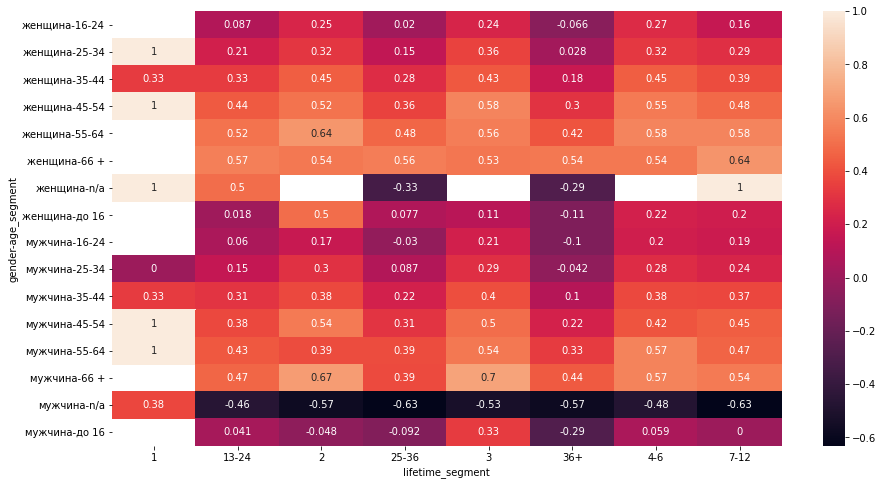

In [13]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = data.assign(total_nps=lambda row: row['nps_group'].map({'сторонники': 1, 'нейтралы': 0, 'критики': -1}))\
  .pivot_table(index=['gender', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

Ссылка на источник данных: https://disk.yandex.com/d/Psh9Mrd6Afb31w

Ссылка на презентацию: https://disk.yandex.com/i/MYucsZxrdEIFSw

Ссылка на презентацию в Tableau: https://public.tableau.com/app/profile/aleks1130/viz/Sprint10_project/NP#1